In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

import csv
import umap
import scanpy as sc

In [2]:
import h5py
from scipy.sparse import csr_matrix

def load_data(dataset,gene_percent_cells=0.01,peak_percent_cells=0.001,include_h5=True,
              preprocess=True,sampling=None,distance=1000000):
    
    data_dir = '/data/cb/alexwu/mm_finemap/datasets/{}'.format(dataset)

    if sampling == 'geosketch':
        rna_adata = sc.read(os.path.join(data_dir,'{}.rna.sketch.h5ad'.format(dataset)))
        atac_adata = sc.read(os.path.join(data_dir,'{}.atac.sketch.h5ad'.format(dataset)))
    elif sampling == 'uniform':
        rna_adata = sc.read(os.path.join(data_dir,'{}.rna.uniform.h5ad'.format(dataset)))
        atac_adata = sc.read(os.path.join(data_dir,'{}.atac.uniform.h5ad'.format(dataset)))        
    else:
        rna_adata = sc.read(os.path.join(data_dir,'{}.rna.h5ad'.format(dataset)))
        atac_adata = sc.read(os.path.join(data_dir,'{}.atac.h5ad'.format(dataset)))

    if dataset == 'sci_car':
        data_dir = '/data/cb/alexwu/mm_finemap/data/sci_car'
        adata = sc.read(os.path.join(data_dir,'adata-hs.h5ad'))

        atac_adata.var['chr_no'] = ['chr' + n for n in atac_adata.var['chr_no']]
        atac_adata.var['start'] = adata.uns['atac.var'][:,2].astype(int)
        atac_adata.var['end'] = adata.uns['atac.var'][:,3].astype(int)

    if preprocess:
        # scale by maximum 
        # (rna already normalized by library size + log-transformed)
        X_max = rna_adata.X.max(0).toarray().squeeze()
        X_max[X_max == 0] = 1
        rna_adata.X = csr_matrix(rna_adata.X / X_max)

        # atac: normalize library size + log transformation
        sc.pp.normalize_total(atac_adata,target_sum=1e4)
        sc.pp.log1p(atac_adata)

    if include_h5:
        data_dir = '/data/cb/alexwu/mm_finemap/datasets/{}'.format(dataset)
        with h5py.File(os.path.join(data_dir,'dataset.h5'),'r') as f:
            print(f.keys())
            data_df = pd.DataFrame()
            for k in ['chr_no','eqtl','hic','dist','atac_id','gene','corr','group_corr','gene_percent_cells',
                      'peak_percent_cells','hg38tohg19_eqtl','eqtl.new','corr_bin','group_corr_bin',
                      'hic_0hr','hic_1hr','hic_4hr','eqtl.q','hic_4hr.expectedBL','eqtl.all','hic.new2',
                      'hic.100kb','ABC.score']: #,
#                      'hic_0hr.expectedBL','hic_1hr.expectedBL','hic_4hr.expectedBL.new','hic_0hr.expectedBL.new',
#                      'hic_4hr.expectedBL.new2','hic_12hr.expectedBL','hic_4hr.expectedBL.full']:
                if k in f.keys():
                    data_df[k] = f[k][:]

        small_df = data_df[abs(data_df['dist']) < distance]

        # small_df = small_df[~np.isnan(small_df['group_corr'])]
        small_df = small_df[small_df['gene_percent_cells'] > gene_percent_cells]
        small_df = small_df[small_df['peak_percent_cells'] > peak_percent_cells]

        small_df.index = [(atac_idx,gene) for atac_idx,gene in small_df[['atac_id','gene']].values]
    
        return rna_adata,atac_adata,small_df

    else:
        
        return rna_adata,atac_adata

In [3]:
import h5py
from scipy.sparse import csr_matrix

def load_data(dataset,gene_percent_cells=0.01,peak_percent_cells=0.001,include_h5=True,
              preprocess=True,sampling=None,distance=1000000):
    
    data_dir = '/data/cb/alexwu/mm_finemap/datasets/{}'.format(dataset)

    if sampling == 'geosketch':
        rna_adata = sc.read(os.path.join(data_dir,'{}.rna.sketch.h5ad'.format(dataset)))
        atac_adata = sc.read(os.path.join(data_dir,'{}.atac.sketch.h5ad'.format(dataset)))
    elif sampling == 'uniform':
        rna_adata = sc.read(os.path.join(data_dir,'{}.rna.uniform.h5ad'.format(dataset)))
        atac_adata = sc.read(os.path.join(data_dir,'{}.atac.uniform.h5ad'.format(dataset)))        
    else:
        rna_adata = sc.read(os.path.join(data_dir,'{}.rna.h5ad'.format(dataset)))
        atac_adata = sc.read(os.path.join(data_dir,'{}.atac.h5ad'.format(dataset)))

    if dataset == 'sci_car':
        data_dir = '/data/cb/alexwu/mm_finemap/data/sci_car'
        adata = sc.read(os.path.join(data_dir,'adata-hs.h5ad'))

        atac_adata.var['chr_no'] = ['chr' + n for n in atac_adata.var['chr_no']]
        atac_adata.var['start'] = adata.uns['atac.var'][:,2].astype(int)
        atac_adata.var['end'] = adata.uns['atac.var'][:,3].astype(int)

    if preprocess:
        # scale by maximum 
        # (rna already normalized by library size + log-transformed)
        X_max = rna_adata.X.max(0).toarray().squeeze()
        X_max[X_max == 0] = 1
        rna_adata.X = csr_matrix(rna_adata.X / X_max)

        # atac: normalize library size + log transformation
        sc.pp.normalize_total(atac_adata,target_sum=1e4)
        sc.pp.log1p(atac_adata)

    if include_h5:
        data_dir = '/data/cb/alexwu/mm_finemap/datasets/{}'.format(dataset)
        with h5py.File(os.path.join(data_dir,'dataset.h5'),'r') as f:
            print(f.keys())
            data_df = pd.DataFrame()
            for k in ['chr_no','eqtl','hic','dist','atac_id','gene','corr','group_corr','gene_percent_cells',
                      'peak_percent_cells','hg38tohg19_eqtl','eqtl.new','corr_bin','group_corr_bin',
                      'hic_0hr','hic_1hr','hic_4hr','eqtl.q','hic_4hr.expectedBL','eqtl.all','hic.new2',
                      'hic.100kb','ABC.score','hic.new']: #,
#                      'hic_0hr.expectedBL','hic_1hr.expectedBL','hic_4hr.expectedBL.new','hic_0hr.expectedBL.new',
#                      'hic_4hr.expectedBL.new2','hic_12hr.expectedBL','hic_4hr.expectedBL.full']:
                if k in f.keys():
                    data_df[k] = f[k][:]

        small_df = data_df[abs(data_df['dist']) < distance]

        # small_df = small_df[~np.isnan(small_df['group_corr'])]
        small_df = small_df[small_df['gene_percent_cells'] > gene_percent_cells]
        small_df = small_df[small_df['peak_percent_cells'] > peak_percent_cells]

        small_df.index = [(atac_idx,gene) for atac_idx,gene in small_df[['atac_id','gene']].values]
    
        return rna_adata,atac_adata,small_df

    else:
        
        return rna_adata,atac_adata

In [4]:
from scipy.stats import rankdata

def load_results(dataset,eval_df,ensemble=False,gene_percent_cells=0.01,peak_percent_cells=0.001):
    
    n_layers = 10
    n_neighbors = 15
    mode = 'lr'

    eval_df['ABC.score'] = eval_df['ABC.score'].replace(np.nan, 0)
    eval_df['ABC.score'] = eval_df['ABC.score'].values #.astype(bool).astype(float)

    eval_df['corr'] = eval_df['corr'].replace(np.nan, 0)
    eval_df['group_corr'] = eval_df['group_corr'].replace(np.nan, 0)

    data_dir = '/data/cb/alexwu/mm_finemap/results/tests_nn/{}'.format(dataset)

    
    if dataset in ['sci_car','snare_seq']:
        
        method = 'graph'
        data_dir = '/data/cb/alexwu/mm_finemap/results/tests_nn/{}'.format(dataset)
        for trial_no in range(1,6):

            file_name = 'graph.trial{}.all.max_scale.mseloss.{}layers.nn{}.statistics.txt'.format(trial_no,n_layers,n_neighbors)
            scores = pd.read_csv(os.path.join(data_dir,file_name),sep='\t').values[:,2].astype(float)
            scores[np.isinf(scores)] = 10**10
            eval_df['{}.trial{}'.format(method,trial_no)] = scores
            
    elif dataset in ['share_seq_more','human_cortex_multiome_lineage']:
        
        method = 'graph'
        for trial_no in range(1,6):

            if trial_no == 1:
                data_dir = '/data/cb/alexwu/mm_finemap/results/tests_nn/{}'.format(dataset)
            else:
                data_dir = '/data/cb/alexwu/mm_finemap/results/tests_nn/{}_{}'.format(dataset,trial_no)

            if dataset == 'human_cortex_multiome_lineage':
                file_name = 'graph.uniform.250kb.trial{}.all.max_scale.mseloss.{}layers.nn{}.statistics.txt'.format(trial_no,n_layers,n_neighbors)
            elif dataset == 'share_seq_more':
                file_name = 'graph.uniform.trial{}.all.max_scale.mseloss.{}layers.nn{}.statistics.txt'.format(trial_no,n_layers,n_neighbors)
            else:
                file_name = 'graph.uniform.trial{}.all.max_scale.mseloss.{}layers.nn{}.statistics.txt'.format(trial_no,n_layers,n_neighbors)

            scores = pd.read_csv(os.path.join(data_dir,file_name),sep='\t').values[:,2].astype(float)
            scores[np.isinf(scores)] = 10**10
            eval_df['{}.trial{}'.format(method,trial_no)] = scores
            
        
            if trial_no == 1:
                data_dir = '/data/cb/alexwu/mm_finemap/datasets/{}'.format(dataset)
            else:
                data_dir = '/data/cb/alexwu/mm_finemap/datasets/{}_{}'.format(dataset,trial_no)

            # correlations
            with h5py.File(os.path.join(data_dir,'dataset.h5'),'r') as f:
                data_df = pd.DataFrame()
                for k in ['dist','corr','group_corr','gene_percent_cells','peak_percent_cells']:
                    if k in f.keys():
                        data_df[k] = f[k][:]

            small_df = data_df[abs(data_df['dist']) < distance]

            # small_df = small_df[~np.isnan(small_df['group_corr'])]
            small_df = small_df[small_df['gene_percent_cells'] > gene_percent_cells]
            small_df = small_df[small_df['peak_percent_cells'] > peak_percent_cells]

            eval_df['corr.trial{}'.format(trial_no)] = small_df['corr'].replace(np.nan, 0).values
            eval_df['group_corr.trial{}'.format(trial_no)] = small_df['group_corr'].replace(np.nan, 0).values

    if ensemble:
                
        for method in ['graph','corr','group_corr']:
            eval_df['{}.ranks.mean'.format(method)] = np.array([rankdata(abs(eval_df['{}.trial{}'.format(method,trial_no)].values),
                                                                method='average') for trial_no in range(1,6)]).mean(0)

        distance_ranks = rankdata(-abs(eval_df['dist'].values),method='average')
        eval_df['dist_ranks'] = distance_ranks

        for feature in ['graph.ranks.mean','group_corr.ranks.mean','corr.ranks.mean']:
            eval_df[feature + '-dist'] = (distance_ranks + eval_df[feature].values)/2
            
    return eval_df

In [5]:
from scipy.stats import f
from statsmodels.stats.multitest import fdrcorrection

def lr_ftest(lr,n_layers,n):
    
    # number of reduced model parameters (W,b for each RNA layer)
    p1 = n_layers * 2 
    # number of full model parameters (W,b for each layer of RNA, ATAC + interaction)
    p2 = n_layers * 2 * 2 + 1 
    
    dfn = 2 * n_layers + 1
    dfd = n - 4 * n_layers - 1

    F = (lr - 1) * (n - p2)/(p2-p1)

    return 1-f.cdf(F,dfn,dfd)

def calculate_fdr(p):
    
    return fdrcorrection(p)[1]

In [6]:
def rank_disease_genes_per_variant(eval_df,trait,score_key,finemap_key='FINEMAP',pp_thresh=1e-2,N=5,score_percentile=50):
    
    data_dir = '/data/cb/alexwu/mm_finemap/data/gwas/human_cortex_multiome'
    file_name = '{}.credible_sets.txt.gz'.format(trait)
    
    gwas_df = pd.read_csv(os.path.join(data_dir,file_name),sep='\t',compression='gzip')
    
    # filter GWAS variants by p-value
    gwas_df = gwas_df[gwas_df[finemap_key] >= pp_thresh]
    gwas_df = gwas_df[gwas_df['atac_id'].notna()]
    gwas_df['atac_id'] = gwas_df['atac_id'].astype(int)
    
    # retain highest PIP per variant
    variant_p_dict = {'{}-{}'.format(chr_no,int(pos)): pp for chr_no,pos,pp 
                      in gwas_df[['chr_liftover','pos_liftover',finemap_key]].values}

    # retain peak-gene pairs that are relevant to GWAS variants
    gwas_peaks_set = set(gwas_df['atac_id'].values)
    filtered_eval_df = eval_df.iloc[[i for i,atac_id in enumerate(eval_df['atac_id'].values) 
                                     if atac_id in gwas_peaks_set]]
    
    filtered_eval_df = filtered_eval_df[['atac_id','gene','dist',score_key]]

    ranked_peak_gene_pairs = {}
    score_thresh = np.percentile(eval_df[score_key],score_percentile)
    
    # only consider each peak once (even if multiple variants per peak)
    for atac_id in sorted(list(gwas_peaks_set)):
        peak_df = filtered_eval_df[filtered_eval_df['atac_id'] == atac_id]
        peak_df = peak_df[peak_df[score_key] >= score_thresh]
        peak_df = peak_df.sort_values(by=score_key,ascending=False)
        peak_df['rank'] = np.arange(peak_df.shape[0])
        peak_df['abs_dist'] = abs(peak_df['dist'])
        ranked_peak_gene_pairs[atac_id] = peak_df.iloc[0:N]

    combined_df_list = []
    for atac_id,chr_no,pos in gwas_df[['atac_id','chr_liftover','pos_liftover']].values:
        peak_df = ranked_peak_gene_pairs[atac_id]
        peak_df['variant'] = '{}-{}'.format(chr_no,int(pos))
        combined_df_list.append(peak_df)
    combined_df = pd.concat(combined_df_list)
    combined_df['log_dist'] = np.log10(combined_df['abs_dist'])
    
    combined_df['gwas_pp'] = [variant_p_dict[variant] for variant in combined_df['variant'].values]
    
    return combined_df

In [7]:
def get_disease_gene_ranks(score_key,sampling,trait,score_percentile=50,N=5,pp_thresh=0.05,per_variant=False):

    save_dir = '/data/cb/alexwu/mm_finemap/results/gwas/disease_genes'
    if per_variant:
        file_name = '{}.{}.{}.trialranks.per_variant.credible_sets.score{}.N{}.pp{}.new.txt'.format(score_key,sampling,trait,score_percentile,N,pp_thresh)
    else:
        file_name = '{}.{}.{}.trialranks.credible_sets.score{}.N{}.pp{}.new.txt'.format(score_key,sampling,trait,score_percentile,N,pp_thresh)
        
    combined_df = pd.read_csv(os.path.join(save_dir,file_name),sep='\t')
    
    return combined_df

## Load Scores + Rankings

In [8]:
dataset = 'human_cortex_multiome_lineage'

distance = 250000
gene_percent_cells = 0.01
peak_percent_cells = 0.001
sampling = 'uniform'

rna_adata,atac_adata,eval_df = load_data(dataset,gene_percent_cells=gene_percent_cells,
                                          peak_percent_cells=peak_percent_cells,
                                          include_h5=True,sampling=sampling,distance=distance)

eval_df = load_results(dataset,eval_df,ensemble=True)

eval_df['log_dist'] = np.log10(1+abs(eval_df['dist']))
eval_df['abs_dist'] = abs(eval_df['dist'])

Only considering the two last: ['.uniform', '.h5ad'].
Only considering the two last: ['.uniform', '.h5ad'].
Only considering the two last: ['.uniform', '.h5ad'].
Only considering the two last: ['.uniform', '.h5ad'].
<KeysViewHDF5 ['ABC.score', 'atac_id', 'chr_no', 'corr', 'dist', 'eqtl.all', 'eqtl.fdr', 'eqtl.gtex', 'gene', 'gene_percent_cells', 'group_corr', 'hic', 'hic.new', 'peak_percent_cells', 'placseq_IPC', 'placseq_RG', 'placseq_eN', 'placseq_iN']>


### Use Canonical TSS

In [9]:
save_dir = '/data/cb/alexwu/mm_finemap/data/ucsc'

bed_df = pd.read_csv(os.path.join(save_dir,'gencodeV39.bed'),sep='\t',header=None)
bed_df[3] = bed_df[17]
bed_df = bed_df.iloc[[i for i,n in enumerate(bed_df[0]) if 'alt' not in n]]
bed_df = bed_df[bed_df[22] == 'protein_coding']
bed_df = bed_df[bed_df[25] == 'canonical,basic,all']
# bed_df = bed_df[bed_df[21] == 'havana_homo_sapiens']

# # save canonical TSS (for use in pygenomebrowser)
bed_df.iloc[:,0:12].to_csv(os.path.join(save_dir,'gencodeV39_bed12.bed'),sep='\t',header=False,index=False)

canonical_tss_dict = {g: tss_plus if direction == '+' else tss_minus 
                      for g,tss_plus,tss_minus,direction in bed_df[[3,1,2,5]].values}

new_txstart = []
for g,tss in zip(*[rna_adata.var.index.values,rna_adata.var['txstart'].values]):
    if g in canonical_tss_dict:
        new_txstart.append(canonical_tss_dict[g])
    else:
        new_txstart.append(tss)
        
rna_adata.var['txstart'] = new_txstart

### Logistic Regression Results

In [10]:
from sklearn.linear_model import LogisticRegression

def transform_X(df,score_key):

#     X = df[[score_key,'log_dist']].values
    X = np.array([np.log(1e-10+df[score_key]),np.clip(np.log10(1+df['abs_dist']),4,10)-4]).T
#     X = np.log10(1e-5 + df[[score_key,'abs_dist']].values)

    return X

def string2coeffs(coeff_str):
    
    values = np.array([float(v) for v in [n.strip('[ ]') 
                        for n in coeff_str.split(' ')] if len(v)])
    
    return np.array([values[0:2]]),np.array([values[2]])

lr = LogisticRegression(penalty='none',fit_intercept=True)

coeff_str = '[[ 0.28332471 -0.16272753]] [-3.66021169]'
coeff_str = '[[ 0.77661531 -0.47272459]] [-10.50656008]'

lr.coef_,lr.intercept_ = string2coeffs(coeff_str)
lr.classes_ = np.array([0,1])

score_key = 'graph.ranks.mean'
X = transform_X(eval_df,score_key)

eval_df['{}-LR-dist'.format(score_key)] = lr.predict_proba(X)[:,1]

### Link Variants to Genes

In [16]:
save_dir = '/data/cb/alexwu/mm_finemap/results/gwas/disease_genes'

score_key = 'graph.ranks.mean-LR-dist'
score_percentile = 0
N = 20
pp_thresh = 0.05

diseases2keep = ['alzheimers','parkinsons','bipolar','multiple_sclerosis','schizophrenia',
                 'schizophrenia_nature'] #,'epilepsy']

for trait in diseases2keep:
    print(trait)

    finemap_key = 'FINEMAP' if 'nature' not in trait else 'finemap_posterior_probability'

    # per GWAS variant
    combined_df = rank_disease_genes_per_variant(eval_df,trait,score_key,finemap_key=finemap_key,
                                                 pp_thresh=pp_thresh,N=N,score_percentile=score_percentile)

    file_name = '{}.{}.{}.trialranks.per_variant.credible_sets.score{}.N{}.pp{}.new.txt'.format(score_key,sampling,trait,score_percentile,N,pp_thresh)
    combined_df.to_csv(os.path.join(save_dir,file_name),sep='\t')

alzheimers
parkinsons
bipolar
multiple_sclerosis
schizophrenia
schizophrenia_nature


### Ranked Enrichment Results

In [15]:
# import gseapy as gp

# score_key = 'graph.ranks.mean-LR-dist'
# sorted_genes = eval_df.sort_values(score_key,ascending=False)['gene'].drop_duplicates().values

# genesets2use = ['CellMarker_Augmented_2021','DisGeNET','OMIM_Disease',
#                 'RNA-Seq_Disease_Gene_and_Drug_Signatures_from_GEO',
#                'Jensen_DISEASES','Jensen_TISSUES','KEGG_2021_Human',
#                 'Disease_Perturbations_from_GEO_up','Disease_Perturbations_from_GEO_down',
#                 'GTEx_Tissue_Expression_Down','GTEx_Tissue_Expression_Up',
#                 'OMIM_Disease','dbGaP','GO_Biological_Process_2021','GO_Molecular_Function_2021',
#                 'GO_Cellular_Component_2021','Reactome_2016']

# save_dir = '/data/cb/alexwu/mm_finemap/results/enrichment'

# rnk = pd.DataFrame(sorted_genes)
# rnk[1] = rnk.shape[0]-np.arange(rnk.shape[0])

# for gene_set in genesets2use[-1:]:
#     print(gene_set)
#     pre_res = gp.prerank(rnk=rnk, gene_sets=gene_set,processes=8,
#                          outdir=os.path.join(save_dir,'gsea_prerank_{}_{}'.format(gene_set,score_key)), seed=1)
    

In [ ]:
save_dir = '/data/cb/alexwu/mm_finemap/results/enrichment'

results_df_list = []
for gene_set in genesets2use:
    
    file_path = os.path.join(save_dir,'gsea_prerank_{}'.format(gene_set),'gseapy.prerank.gene_sets.report.csv')
    if os.path.exists(file_path):
        results_df = pd.read_csv(file_path)
        results_df['gene_set'] = gene_set
        results_df_list.append(results_df)
        
results_df = pd.concat(results_df_list)

In [29]:
gene_set = 'GO_Biological_Process_2021'

results_df[(results_df['fdr'] < 0.05) & (results_df['gene_set'] == gene_set) & (results_df['es'] > 0)]

,Term,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes,gene_set
15,purine nucleotide metabolic process (GO:0006163),0.645126,1.843612,0.000000,0.013491,24,16,PNP;NUDT15;PPAT;ITPA;NT5C;ADSL;GDA;NT5E;GART;G...,PNP;NUDT15;PPAT;ITPA;NT5C;ADSL;GDA;NT5E,GO_Biological_Process_2021
16,neuronal action potential (GO:0019228),0.636502,1.845216,0.001019,0.013969,22,17,SCN11A;SCN5A;CACNA1G;KCNMB4;KCNA2;MYH14;SCN1A;...,SCN11A;SCN5A;CACNA1G;KCNMB4;KCNA2;MYH14;SCN1A;...,GO_Biological_Process_2021
17,cardiac muscle cell action potential involved ...,0.611172,1.809648,0.001012,0.021379,31,19,SNTA1;SCN5A;PKP2;CACNA1G;SCN1A;CAV3;ANK2;KCNQ1...,SNTA1;SCN5A;PKP2;CACNA1G;SCN1A;CAV3;ANK2;KCNQ1,GO_Biological_Process_2021
18,action potential (GO:0001508),0.563427,1.795362,0.000000,0.025778,45,31,GNA14;SCN11A;SCN5A;CACNA1G;KCNMB4;KCNA2;MYH14;...,GNA14;SCN11A;SCN5A;CACNA1G;KCNMB4;KCNA2;MYH14;...,GO_Biological_Process_2021
19,cardiac muscle cell action potential (GO:0086001),0.589429,1.784577,0.001006,0.026327,30,22,HCN2;HCN4;SCN5A;PKP2;CACNA1G;SCN1A;SLC4A3;ANK2...,HCN2;HCN4;SCN5A;PKP2;CACNA1G;SCN1A;SLC4A3;ANK2...,GO_Biological_Process_2021
20,regulation of cardiac muscle cell contraction ...,0.582740,1.785826,0.000000,0.027117,27,23,PDE4D;ATP2A1;STC1;HCN4;SCN5A;DSC2;JUP;PKP2;DSG...,PDE4D;ATP2A1;STC1;HCN4;SCN5A;DSC2;JUP;PKP2;DSG...,GO_Biological_Process_2021
21,myofibril assembly (GO:0030239),0.592742,1.786871,0.001007,0.028182,43,22,CAPN3;MYH3;CFLAR;SYNPO2L;OBSL1;FLII;PGM5;TCAP;...,CAPN3;MYH3;CFLAR;SYNPO2L;OBSL1;FLII;PGM5;TCAP;...,GO_Biological_Process_2021
22,regulation of mitochondrial translation (GO:00...,0.596013,1.767829,0.000000,0.031266,21,21,C1QBP;TRMT10C;COA3;TSFM;SHMT2;NSUN3;RPUSD3;MPV...,C1QBP;TRMT10C;COA3;TSFM;SHMT2;NSUN3;RPUSD3;MPV...,GO_Biological_Process_2021
23,regulation of viral life cycle (GO:1903900),0.624067,1.764393,0.001028,0.031583,26,16,TRIM68;TRIM5;NECTIN2;TRIM22;AXL;TYRO3;VPS4A;TR...,TRIM68;TRIM5;NECTIN2;TRIM22;AXL;TYRO3;VPS4A,GO_Biological_Process_2021
24,regulation of heart rate by cardiac conduction...,0.582853,1.758190,0.000000,0.032730,39,23,HCN4;SCN5A;BIN1;DSC2;JUP;PKP2;CACNA1G;DSG2;ANK...,HCN4;SCN5A;BIN1;DSC2;JUP;PKP2;CACNA1G;DSG2;ANK...,GO_Biological_Process_2021


In [31]:
gene_set = 'GO_Biological_Process_2021'

results_df[(results_df['fdr'] < 0.05) & (results_df['gene_set'] == gene_set)]['Term'].values

array(['Fc receptor mediated stimulatory signaling pathway (GO:0002431)',
       'Fc-gamma receptor signaling pathway (GO:0038094)',
       'Fc-gamma receptor signaling pathway involved in phagocytosis (GO:0038096)',
       'SRP-dependent cotranslational protein targeting to membrane (GO:0006614)',
       'axonal transport (GO:0098930)',
       'cotranslational protein targeting to membrane (GO:0006613)',
       'cytoplasmic translation (GO:0002181)',
       'negative regulation of cell cycle G2/M phase transition (GO:1902750)',
       'negative regulation of cysteine-type endopeptidase activity involved in apoptotic process (GO:0043154)',
       'nuclear-transcribed mRNA catabolic process (GO:0000956)',
       'nuclear-transcribed mRNA catabolic process, nonsense-mediated decay (GO:0000184)',
       'positive regulation of TOR signaling (GO:0032008)',
       'regulation of alternative mRNA splicing, via spliceosome (GO:0000381)',
       'regulation of cellular amine metabolic process 

In [ ]:
# interesting enrichment terms

'Lake Et al.Science.Ex7:Brain','Lake Et al.Science.In1:Brain','Neuronal Progenitor cell:Undefined'

[ 'neuronal action potential (GO:0019228)',
       'cardiac muscle cell action potential involved in contraction (GO:0086002)',
       'action potential (GO:0001508)',
       'cardiac muscle cell action potential (GO:0086001)',
       'regulation of cardiac muscle cell contraction (GO:0086004)',
       'myofibril assembly (GO:0030239)']

## Disease Gene Enrichment

In [31]:
import gseapy as gp
from collections import Counter

score_key = 'graph.ranks.mean-LR-dist'

background_genes = list(set(eval_df['gene']))

# gene set enrichment
genesets2use = ['CellMarker_Augmented_2021','DisGeNET','OMIM_Disease',
                'RNA-Seq_Disease_Gene_and_Drug_Signatures_from_GEO',
               'Jensen_DISEASES','Jensen_TISSUES','KEGG_2021_Human',
                'Disease_Perturbations_from_GEO_up','Disease_Perturbations_from_GEO_down',
                'GTEx_Tissue_Expression_Down','GTEx_Tissue_Expression_Up',
                'OMIM_Disease','dbGaP','GO_Biological_Process_2021','GO_Molecular_Function_2021',
                'GO_Cellular_Component_2021']

outdir = '/data/cb/alexwu/mm_finemap/results/gwas/disease_genes_enrichment/enrichr'

for score_percentile in [50,80,90,95]:

    n_rank = 3
    N = 20
    threshold = np.percentile(eval_df[score_key].values,score_percentile)
    
    sampling = 'uniform'
    
    per_variant = True
    diseases2keep = ['alzheimers','parkinsons','bipolar','multiple_sclerosis','schizophrenia_nature']

    dataset = 'human_cortex_multiome_lineage'

    combined_df_dict = {}
    counts_df_dict = {}
    for trait in diseases2keep:

        # get predicted variant-gene links
        combined_df = get_disease_gene_ranks(score_key,sampling,trait,
                                             score_percentile=0,
                                             per_variant=per_variant,
                                             N=N)
        
        combined_df = combined_df[combined_df['rank'] < n_rank]
        combined_df = combined_df[combined_df['gwas_pp'] > 0.05]
        combined_df = combined_df.drop_duplicates()

        # threshold by GrID-Net score
        combined_df = combined_df[combined_df[score_key] >= threshold]

        if per_variant:
            combined_df['chr_no'] = [n.split('-')[0] for n in combined_df['variant']]
            combined_df['pos'] = [int(float(n.split('-')[1])) for n in combined_df['variant']]

        if combined_df.shape[0]:
            combined_df_dict[trait] = combined_df

            counts_df = pd.DataFrame(np.array(Counter(combined_df['gene']).most_common()),columns=['gene','counts'])
            counts_df['counts'] = counts_df['counts'].astype(int)
            counts_df.index = counts_df['gene'].values
            counts_df['rank'] = np.arange(counts_df.shape[0]) + 1
            counts_df_dict[trait] = counts_df 

    for trait,counts_df in counts_df_dict.items():
        if trait not in []:
            gene_list = counts_df['gene'].values.tolist()
            print(trait) #,gene_list)
            enr = gp.enrichr(gene_list=gene_list,
                             gene_sets=genesets2use,
                             organism='Human',
                             description='test_name',
                             outdir=os.path.join(outdir,trait),
                             background=background_genes,
                             cutoff=0.05
                            )

            results_df = enr.results[enr.results['Adjusted P-value'] < 0.1]
            results_df.to_csv(os.path.join(outdir,'{}.{}.{}.score{}.N{}.trialranks.credible_sets.all_genes.enrichr.tsv'.format(score_key,sampling,trait,score_percentile,n_rank)),
                              sep='\t',index=False)




alzheimers


2022-06-11 20:24:00,236 Warning: No enrich terms using library CellMarker_Augmented_2021 when cutoff = 0.05
2022-06-11 20:24:04,568 Warning: No enrich terms using library RNA-Seq_Disease_Gene_and_Drug_Signatures_from_GEO when cutoff = 0.05
2022-06-11 20:24:07,410 Warning: No enrich terms using library Jensen_TISSUES when cutoff = 0.05
2022-06-11 20:24:08,691 Warning: No enrich terms using library KEGG_2021_Human when cutoff = 0.05
2022-06-11 20:24:09,994 Warning: No enrich terms using library Disease_Perturbations_from_GEO_up when cutoff = 0.05
2022-06-11 20:24:11,289 Warning: No enrich terms using library Disease_Perturbations_from_GEO_down when cutoff = 0.05
2022-06-11 20:24:12,646 Warning: No enrich terms using library GTEx_Tissue_Expression_Down when cutoff = 0.05
2022-06-11 20:24:14,014 Warning: No enrich terms using library GTEx_Tissue_Expression_Up when cutoff = 0.05


parkinsons


2022-06-11 20:24:23,308 Warning: No enrich terms using library CellMarker_Augmented_2021 when cutoff = 0.05
2022-06-11 20:24:24,595 Warning: No enrich terms using library DisGeNET when cutoff = 0.05
2022-06-11 20:24:25,867 Warning: No enrich terms using library OMIM_Disease when cutoff = 0.05
2022-06-11 20:24:27,156 Warning: No enrich terms using library RNA-Seq_Disease_Gene_and_Drug_Signatures_from_GEO when cutoff = 0.05
2022-06-11 20:24:29,927 Warning: No enrich terms using library Jensen_TISSUES when cutoff = 0.05
2022-06-11 20:24:31,198 Warning: No enrich terms using library KEGG_2021_Human when cutoff = 0.05
2022-06-11 20:24:32,467 Warning: No enrich terms using library Disease_Perturbations_from_GEO_up when cutoff = 0.05
2022-06-11 20:24:33,732 Warning: No enrich terms using library Disease_Perturbations_from_GEO_down when cutoff = 0.05
2022-06-11 20:24:35,036 Warning: No enrich terms using library GTEx_Tissue_Expression_Down when cutoff = 0.05
2022-06-11 20:24:36,362 Warning: No

bipolar


2022-06-11 20:24:44,644 Warning: No enrich terms using library CellMarker_Augmented_2021 when cutoff = 0.05
2022-06-11 20:24:47,392 Warning: No enrich terms using library OMIM_Disease when cutoff = 0.05
2022-06-11 20:24:48,687 Warning: No enrich terms using library RNA-Seq_Disease_Gene_and_Drug_Signatures_from_GEO when cutoff = 0.05
2022-06-11 20:24:51,503 Warning: No enrich terms using library Jensen_TISSUES when cutoff = 0.05
2022-06-11 20:24:52,780 Warning: No enrich terms using library KEGG_2021_Human when cutoff = 0.05
2022-06-11 20:24:54,056 Warning: No enrich terms using library Disease_Perturbations_from_GEO_up when cutoff = 0.05
2022-06-11 20:24:55,354 Warning: No enrich terms using library Disease_Perturbations_from_GEO_down when cutoff = 0.05
2022-06-11 20:24:56,687 Warning: No enrich terms using library GTEx_Tissue_Expression_Down when cutoff = 0.05
2022-06-11 20:24:58,033 Warning: No enrich terms using library GTEx_Tissue_Expression_Up when cutoff = 0.05
2022-06-11 20:24:5

multiple_sclerosis


2022-06-11 20:25:06,655 Warning: No enrich terms using library CellMarker_Augmented_2021 when cutoff = 0.05
2022-06-11 20:25:07,983 Warning: No enrich terms using library DisGeNET when cutoff = 0.05
2022-06-11 20:25:09,275 Warning: No enrich terms using library OMIM_Disease when cutoff = 0.05
2022-06-11 20:25:10,595 Warning: No enrich terms using library RNA-Seq_Disease_Gene_and_Drug_Signatures_from_GEO when cutoff = 0.05
2022-06-11 20:25:13,392 Warning: No enrich terms using library Jensen_TISSUES when cutoff = 0.05
2022-06-11 20:25:14,704 Warning: No enrich terms using library KEGG_2021_Human when cutoff = 0.05
2022-06-11 20:25:16,034 Warning: No enrich terms using library Disease_Perturbations_from_GEO_up when cutoff = 0.05
2022-06-11 20:25:17,356 Warning: No enrich terms using library Disease_Perturbations_from_GEO_down when cutoff = 0.05
2022-06-11 20:25:18,737 Warning: No enrich terms using library GTEx_Tissue_Expression_Down when cutoff = 0.05
2022-06-11 20:25:20,156 Warning: No

schizophrenia_nature


2022-06-11 20:25:28,660 Warning: No enrich terms using library CellMarker_Augmented_2021 when cutoff = 0.05
2022-06-11 20:25:33,403 Warning: No enrich terms using library RNA-Seq_Disease_Gene_and_Drug_Signatures_from_GEO when cutoff = 0.05
2022-06-11 20:25:36,439 Warning: No enrich terms using library Jensen_TISSUES when cutoff = 0.05
2022-06-11 20:25:37,854 Warning: No enrich terms using library KEGG_2021_Human when cutoff = 0.05
2022-06-11 20:25:39,300 Warning: No enrich terms using library Disease_Perturbations_from_GEO_up when cutoff = 0.05
2022-06-11 20:25:40,747 Warning: No enrich terms using library Disease_Perturbations_from_GEO_down when cutoff = 0.05
2022-06-11 20:25:42,315 Warning: No enrich terms using library GTEx_Tissue_Expression_Down when cutoff = 0.05
2022-06-11 20:25:43,879 Warning: No enrich terms using library GTEx_Tissue_Expression_Up when cutoff = 0.05
2022-06-11 20:25:46,886 Warning: No enrich terms using library dbGaP when cutoff = 0.05
2022-06-11 20:25:48,351 W

alzheimers


2022-06-11 20:25:52,683 Warning: No enrich terms using library CellMarker_Augmented_2021 when cutoff = 0.05
2022-06-11 20:25:57,001 Warning: No enrich terms using library RNA-Seq_Disease_Gene_and_Drug_Signatures_from_GEO when cutoff = 0.05
2022-06-11 20:26:00,002 Warning: No enrich terms using library Jensen_TISSUES when cutoff = 0.05
2022-06-11 20:26:01,293 Warning: No enrich terms using library KEGG_2021_Human when cutoff = 0.05
2022-06-11 20:26:02,582 Warning: No enrich terms using library Disease_Perturbations_from_GEO_up when cutoff = 0.05
2022-06-11 20:26:03,876 Warning: No enrich terms using library Disease_Perturbations_from_GEO_down when cutoff = 0.05
2022-06-11 20:26:05,214 Warning: No enrich terms using library GTEx_Tissue_Expression_Down when cutoff = 0.05


parkinsons


2022-06-11 20:26:18,780 Warning: No enrich terms using library OMIM_Disease when cutoff = 0.05
2022-06-11 20:26:23,028 Warning: No enrich terms using library Jensen_TISSUES when cutoff = 0.05
2022-06-11 20:26:24,303 Warning: No enrich terms using library KEGG_2021_Human when cutoff = 0.05
2022-06-11 20:26:25,575 Warning: No enrich terms using library Disease_Perturbations_from_GEO_up when cutoff = 0.05
2022-06-11 20:26:26,850 Warning: No enrich terms using library Disease_Perturbations_from_GEO_down when cutoff = 0.05
2022-06-11 20:26:28,136 Warning: No enrich terms using library GTEx_Tissue_Expression_Down when cutoff = 0.05
2022-06-11 20:26:29,445 Warning: No enrich terms using library GTEx_Tissue_Expression_Up when cutoff = 0.05
2022-06-11 20:26:30,712 Warning: No enrich terms using library OMIM_Disease when cutoff = 0.05
2022-06-11 20:26:31,982 Warning: No enrich terms using library dbGaP when cutoff = 0.05
2022-06-11 20:26:33,260 Warning: No enrich terms using library GO_Biologica

bipolar


2022-06-11 20:26:37,396 Warning: No enrich terms using library CellMarker_Augmented_2021 when cutoff = 0.05
2022-06-11 20:26:40,237 Warning: No enrich terms using library OMIM_Disease when cutoff = 0.05
2022-06-11 20:26:41,525 Warning: No enrich terms using library RNA-Seq_Disease_Gene_and_Drug_Signatures_from_GEO when cutoff = 0.05
2022-06-11 20:26:44,248 Warning: No enrich terms using library Jensen_TISSUES when cutoff = 0.05
2022-06-11 20:26:47,068 Warning: No enrich terms using library Disease_Perturbations_from_GEO_up when cutoff = 0.05
2022-06-11 20:26:48,337 Warning: No enrich terms using library Disease_Perturbations_from_GEO_down when cutoff = 0.05
2022-06-11 20:26:49,649 Warning: No enrich terms using library GTEx_Tissue_Expression_Down when cutoff = 0.05
2022-06-11 20:26:50,961 Warning: No enrich terms using library GTEx_Tissue_Expression_Up when cutoff = 0.05
2022-06-11 20:26:52,231 Warning: No enrich terms using library OMIM_Disease when cutoff = 0.05


multiple_sclerosis


2022-06-11 20:26:59,834 Warning: No enrich terms using library CellMarker_Augmented_2021 when cutoff = 0.05
2022-06-11 20:27:01,131 Warning: No enrich terms using library DisGeNET when cutoff = 0.05
2022-06-11 20:27:02,420 Warning: No enrich terms using library OMIM_Disease when cutoff = 0.05
2022-06-11 20:27:03,746 Warning: No enrich terms using library RNA-Seq_Disease_Gene_and_Drug_Signatures_from_GEO when cutoff = 0.05
2022-06-11 20:27:06,598 Warning: No enrich terms using library Jensen_TISSUES when cutoff = 0.05
2022-06-11 20:27:07,905 Warning: No enrich terms using library KEGG_2021_Human when cutoff = 0.05
2022-06-11 20:27:09,211 Warning: No enrich terms using library Disease_Perturbations_from_GEO_up when cutoff = 0.05
2022-06-11 20:27:10,510 Warning: No enrich terms using library Disease_Perturbations_from_GEO_down when cutoff = 0.05
2022-06-11 20:27:11,882 Warning: No enrich terms using library GTEx_Tissue_Expression_Down when cutoff = 0.05
2022-06-11 20:27:13,260 Warning: No

schizophrenia_nature


2022-06-11 20:27:21,431 Warning: No enrich terms using library CellMarker_Augmented_2021 when cutoff = 0.05
2022-06-11 20:27:22,840 Warning: No enrich terms using library DisGeNET when cutoff = 0.05
2022-06-11 20:27:24,180 Warning: No enrich terms using library OMIM_Disease when cutoff = 0.05
2022-06-11 20:27:25,580 Warning: No enrich terms using library RNA-Seq_Disease_Gene_and_Drug_Signatures_from_GEO when cutoff = 0.05
2022-06-11 20:27:26,943 Warning: No enrich terms using library Jensen_DISEASES when cutoff = 0.05
2022-06-11 20:27:28,316 Warning: No enrich terms using library Jensen_TISSUES when cutoff = 0.05
2022-06-11 20:27:29,733 Warning: No enrich terms using library KEGG_2021_Human when cutoff = 0.05
2022-06-11 20:27:31,108 Warning: No enrich terms using library Disease_Perturbations_from_GEO_up when cutoff = 0.05
2022-06-11 20:27:32,480 Warning: No enrich terms using library Disease_Perturbations_from_GEO_down when cutoff = 0.05
2022-06-11 20:27:33,949 Warning: No enrich term

alzheimers


2022-06-11 20:27:46,969 Warning: No enrich terms using library OMIM_Disease when cutoff = 0.05
2022-06-11 20:27:48,260 Warning: No enrich terms using library RNA-Seq_Disease_Gene_and_Drug_Signatures_from_GEO when cutoff = 0.05
2022-06-11 20:27:51,091 Warning: No enrich terms using library Jensen_TISSUES when cutoff = 0.05
2022-06-11 20:27:52,361 Warning: No enrich terms using library KEGG_2021_Human when cutoff = 0.05
2022-06-11 20:27:53,655 Warning: No enrich terms using library Disease_Perturbations_from_GEO_up when cutoff = 0.05
2022-06-11 20:27:56,476 Warning: No enrich terms using library GTEx_Tissue_Expression_Down when cutoff = 0.05
2022-06-11 20:27:57,812 Warning: No enrich terms using library GTEx_Tissue_Expression_Up when cutoff = 0.05
2022-06-11 20:27:59,092 Warning: No enrich terms using library OMIM_Disease when cutoff = 0.05


parkinsons


2022-06-11 20:28:09,668 Warning: No enrich terms using library OMIM_Disease when cutoff = 0.05
2022-06-11 20:28:15,696 Warning: No enrich terms using library KEGG_2021_Human when cutoff = 0.05
2022-06-11 20:28:20,137 Warning: No enrich terms using library GTEx_Tissue_Expression_Down when cutoff = 0.05
2022-06-11 20:28:21,424 Warning: No enrich terms using library GTEx_Tissue_Expression_Up when cutoff = 0.05
2022-06-11 20:28:22,692 Warning: No enrich terms using library OMIM_Disease when cutoff = 0.05
2022-06-11 20:28:23,963 Warning: No enrich terms using library dbGaP when cutoff = 0.05
2022-06-11 20:28:25,241 Warning: No enrich terms using library GO_Biological_Process_2021 when cutoff = 0.05
2022-06-11 20:28:27,964 Warning: No enrich terms using library GO_Cellular_Component_2021 when cutoff = 0.05


bipolar


2022-06-11 20:28:29,368 Warning: No enrich terms using library CellMarker_Augmented_2021 when cutoff = 0.05
2022-06-11 20:28:32,192 Warning: No enrich terms using library OMIM_Disease when cutoff = 0.05
2022-06-11 20:28:33,469 Warning: No enrich terms using library RNA-Seq_Disease_Gene_and_Drug_Signatures_from_GEO when cutoff = 0.05
2022-06-11 20:28:34,738 Warning: No enrich terms using library Jensen_DISEASES when cutoff = 0.05
2022-06-11 20:28:36,009 Warning: No enrich terms using library Jensen_TISSUES when cutoff = 0.05
2022-06-11 20:28:38,742 Warning: No enrich terms using library Disease_Perturbations_from_GEO_up when cutoff = 0.05
2022-06-11 20:28:40,016 Warning: No enrich terms using library Disease_Perturbations_from_GEO_down when cutoff = 0.05
2022-06-11 20:28:41,302 Warning: No enrich terms using library GTEx_Tissue_Expression_Down when cutoff = 0.05
2022-06-11 20:28:42,583 Warning: No enrich terms using library GTEx_Tissue_Expression_Up when cutoff = 0.05
2022-06-11 20:28:4

multiple_sclerosis


2022-06-11 20:28:51,049 Warning: No enrich terms using library CellMarker_Augmented_2021 when cutoff = 0.05
2022-06-11 20:28:52,347 Warning: No enrich terms using library DisGeNET when cutoff = 0.05
2022-06-11 20:28:53,629 Warning: No enrich terms using library OMIM_Disease when cutoff = 0.05
2022-06-11 20:28:54,937 Warning: No enrich terms using library RNA-Seq_Disease_Gene_and_Drug_Signatures_from_GEO when cutoff = 0.05
2022-06-11 20:28:57,739 Warning: No enrich terms using library Jensen_TISSUES when cutoff = 0.05
2022-06-11 20:28:59,015 Warning: No enrich terms using library KEGG_2021_Human when cutoff = 0.05
2022-06-11 20:29:00,313 Warning: No enrich terms using library Disease_Perturbations_from_GEO_up when cutoff = 0.05
2022-06-11 20:29:01,607 Warning: No enrich terms using library Disease_Perturbations_from_GEO_down when cutoff = 0.05
2022-06-11 20:29:02,968 Warning: No enrich terms using library GTEx_Tissue_Expression_Down when cutoff = 0.05
2022-06-11 20:29:04,324 Warning: No

schizophrenia_nature


2022-06-11 20:29:12,608 Warning: No enrich terms using library CellMarker_Augmented_2021 when cutoff = 0.05
2022-06-11 20:29:13,966 Warning: No enrich terms using library DisGeNET when cutoff = 0.05
2022-06-11 20:29:15,275 Warning: No enrich terms using library OMIM_Disease when cutoff = 0.05
2022-06-11 20:29:16,633 Warning: No enrich terms using library RNA-Seq_Disease_Gene_and_Drug_Signatures_from_GEO when cutoff = 0.05
2022-06-11 20:29:17,946 Warning: No enrich terms using library Jensen_DISEASES when cutoff = 0.05
2022-06-11 20:29:19,269 Warning: No enrich terms using library Jensen_TISSUES when cutoff = 0.05
2022-06-11 20:29:20,581 Warning: No enrich terms using library KEGG_2021_Human when cutoff = 0.05
2022-06-11 20:29:21,910 Warning: No enrich terms using library Disease_Perturbations_from_GEO_up when cutoff = 0.05
2022-06-11 20:29:23,237 Warning: No enrich terms using library Disease_Perturbations_from_GEO_down when cutoff = 0.05
2022-06-11 20:29:24,646 Warning: No enrich term

alzheimers


2022-06-11 20:29:37,664 Warning: No enrich terms using library OMIM_Disease when cutoff = 0.05
2022-06-11 20:29:42,248 Warning: No enrich terms using library Jensen_TISSUES when cutoff = 0.05
2022-06-11 20:29:46,439 Warning: No enrich terms using library Disease_Perturbations_from_GEO_down when cutoff = 0.05
2022-06-11 20:29:47,760 Warning: No enrich terms using library GTEx_Tissue_Expression_Down when cutoff = 0.05
2022-06-11 20:29:49,080 Warning: No enrich terms using library GTEx_Tissue_Expression_Up when cutoff = 0.05
2022-06-11 20:29:50,350 Warning: No enrich terms using library OMIM_Disease when cutoff = 0.05


parkinsons


2022-06-11 20:30:00,823 Warning: No enrich terms using library OMIM_Disease when cutoff = 0.05
2022-06-11 20:30:06,670 Warning: No enrich terms using library KEGG_2021_Human when cutoff = 0.05
2022-06-11 20:30:11,094 Warning: No enrich terms using library GTEx_Tissue_Expression_Down when cutoff = 0.05
2022-06-11 20:30:12,383 Warning: No enrich terms using library GTEx_Tissue_Expression_Up when cutoff = 0.05
2022-06-11 20:30:13,653 Warning: No enrich terms using library OMIM_Disease when cutoff = 0.05
2022-06-11 20:30:14,932 Warning: No enrich terms using library dbGaP when cutoff = 0.05
2022-06-11 20:30:16,209 Warning: No enrich terms using library GO_Biological_Process_2021 when cutoff = 0.05
2022-06-11 20:30:18,944 Warning: No enrich terms using library GO_Cellular_Component_2021 when cutoff = 0.05


multiple_sclerosis


2022-06-11 20:30:20,357 Warning: No enrich terms using library CellMarker_Augmented_2021 when cutoff = 0.05
2022-06-11 20:30:23,109 Warning: No enrich terms using library OMIM_Disease when cutoff = 0.05
2022-06-11 20:30:27,552 Warning: No enrich terms using library Jensen_TISSUES when cutoff = 0.05
2022-06-11 20:30:28,835 Warning: No enrich terms using library KEGG_2021_Human when cutoff = 0.05
2022-06-11 20:30:30,138 Warning: No enrich terms using library Disease_Perturbations_from_GEO_up when cutoff = 0.05
2022-06-11 20:30:31,429 Warning: No enrich terms using library Disease_Perturbations_from_GEO_down when cutoff = 0.05
2022-06-11 20:30:32,768 Warning: No enrich terms using library GTEx_Tissue_Expression_Down when cutoff = 0.05
2022-06-11 20:30:34,106 Warning: No enrich terms using library GTEx_Tissue_Expression_Up when cutoff = 0.05
2022-06-11 20:30:35,386 Warning: No enrich terms using library OMIM_Disease when cutoff = 0.05
2022-06-11 20:30:39,762 Warning: No enrich terms using 

schizophrenia_nature


2022-06-11 20:30:45,677 Warning: No enrich terms using library OMIM_Disease when cutoff = 0.05
2022-06-11 20:30:50,075 Warning: No enrich terms using library Jensen_TISSUES when cutoff = 0.05
2022-06-11 20:30:51,373 Warning: No enrich terms using library KEGG_2021_Human when cutoff = 0.05
2022-06-11 20:30:52,683 Warning: No enrich terms using library Disease_Perturbations_from_GEO_up when cutoff = 0.05
2022-06-11 20:30:53,989 Warning: No enrich terms using library Disease_Perturbations_from_GEO_down when cutoff = 0.05
2022-06-11 20:30:55,364 Warning: No enrich terms using library GTEx_Tissue_Expression_Down when cutoff = 0.05
2022-06-11 20:30:56,746 Warning: No enrich terms using library GTEx_Tissue_Expression_Up when cutoff = 0.05
2022-06-11 20:30:58,040 Warning: No enrich terms using library OMIM_Disease when cutoff = 0.05
2022-06-11 20:31:02,339 Warning: No enrich terms using library GO_Molecular_Function_2021 when cutoff = 0.05
2022-06-11 20:31:03,636 Warning: No enrich terms using

In [11]:
outdir = '/data/cb/alexwu/mm_finemap/results/gwas/disease_genes_enrichment/enrichr'

dataset = 'human_cortex_multiome_lineage'
n_rank = 3
score_percentile = 50

results_df_list = []
for trait in diseases2keep:
    if trait != 'epilepsy':
        file_name = '{}.{}.{}.score{}.N{}.trialranks.credible_sets.all_genes.enrichr.tsv'.format(score_key,sampling,trait,score_percentile,n_rank)
        results_df = pd.read_csv(os.path.join(outdir,file_name),sep='\t')
        results_df['trait'] = trait
        results_df_list.append(results_df)
results_df = pd.concat(results_df_list)
results_df = results_df[results_df['Adjusted P-value'] < 0.1] #[['Term','']]
inds2keep = [i for i,n in enumerate(results_df['Overlap']) if int(n.split('/')[0]) > 1]
results_df = results_df.iloc[inds2keep]
results_df

NameError: name 'diseases2keep' is not defined

In [32]:
outdir = '/data/cb/alexwu/mm_finemap/results/gwas/disease_genes_enrichment/enrichr'

dataset = 'human_cortex_multiome_lineage'
n_rank = 3
score_percentile = 50

results_df_list = []
for trait in diseases2keep:
    if trait != 'epilepsy':
        file_name = '{}.{}.{}.score{}.N{}.trialranks.credible_sets.all_genes.enrichr.tsv'.format(score_key,sampling,trait,score_percentile,n_rank)
        results_df = pd.read_csv(os.path.join(outdir,file_name),sep='\t')
        results_df['trait'] = trait
        results_df_list.append(results_df)
results_df = pd.concat(results_df_list)
results_df = results_df[results_df['Adjusted P-value'] < 0.1] #[['Term','']]
inds2keep = [i for i,n in enumerate(results_df['Overlap']) if int(n.split('/')[0]) > 1]
results_df = results_df.iloc[inds2keep]
results_df

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,trait
0,CellMarker_Augmented_2021,Leydig cell:Fetal Gonad,3/380,0.003170,0.091497,0,0,12.001836,69.057130,CCDC25;TACO1;APOC1,alzheimers
6,CellMarker_Augmented_2021,Microglial cell:Embryonic Prefrontal Cortex,2/472,0.053620,0.091497,0,0,5.931307,17.353987,GSTK1;APOC1,alzheimers
73,DisGeNET,Primary Progressive Aphasia (disorder),2/18,0.000091,0.029642,0,0,178.285714,1658.655789,TOMM40;APOC1,alzheimers
74,DisGeNET,High density lipoprotein measurement,4/324,0.000105,0.029642,0,0,20.483333,187.563890,TOMM40;APOC1;NECTIN2;DDB2,alzheimers
75,DisGeNET,Behavioral variant of frontotemporal dementia,2/24,0.000164,0.030706,0,0,129.623377,1129.821941,TOMM40;APOC1,alzheimers
...,...,...,...,...,...,...,...,...,...,...,...
1,OMIM_Disease,neuropathy,3/35,0.001576,0.012608,0,0,14.415698,93.022298,CTDP1;SLC12A6;POLG,schizophrenia_nature
2,Jensen_DISEASES,Mood disorder,3/9,0.000023,0.003898,0,0,76.984496,822.432784,SMIM4;NEK4;GLT8D1,schizophrenia_nature
3,OMIM_Disease,neuropathy,3/35,0.001576,0.012608,0,0,14.415698,93.022298,CTDP1;SLC12A6;POLG,schizophrenia_nature
4,dbGaP,Immunoglobulin E,2/9,0.001510,0.078509,0,0,43.650549,283.544522,NAB2;STAT6,schizophrenia_nature


In [33]:
results_df[results_df['trait'] == 'schizophrenia_nature']

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,trait
0,DisGeNET,Schizophrenia,29/1923,0.000018,0.029092,0,0,2.671933,29.230253,DLX1;TMPRSS5;NAB2;GLT8D1;GTDC1;FURIN;MSI2;FOXO...,schizophrenia_nature
1,OMIM_Disease,neuropathy,3/35,0.001576,0.012608,0,0,14.415698,93.022298,CTDP1;SLC12A6;POLG,schizophrenia_nature
2,Jensen_DISEASES,Mood disorder,3/9,0.000023,0.003898,0,0,76.984496,822.432784,SMIM4;NEK4;GLT8D1,schizophrenia_nature
3,OMIM_Disease,neuropathy,3/35,0.001576,0.012608,0,0,14.415698,93.022298,CTDP1;SLC12A6;POLG,schizophrenia_nature
4,dbGaP,Immunoglobulin E,2/9,0.001510,0.078509,0,0,43.650549,283.544522,NAB2;STAT6,schizophrenia_nature
5,dbGaP,Creatinine,4/92,0.003236,0.084127,0,0,7.024148,40.273118,NTNG2;FUT9;KIF21B;FOXO3,schizophrenia_nature


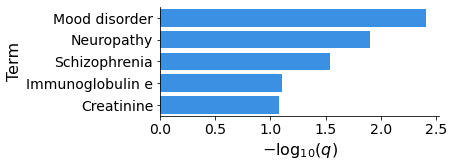

In [48]:
plot_df = results_df[results_df['trait'] == 'schizophrenia_nature'].drop_duplicates()

plot_df = plot_df.loc[[0,1,2,4,5]]

plot_df['Term'] = [n.capitalize() for n in plot_df['Term']]
plot_df['-log10q'] = -np.log10(plot_df['Adjusted P-value'])

plt.figure(figsize=(5,2.))
sns.barplot(x='-log10q',y='Term',data=plot_df.sort_values('Adjusted P-value'),color='dodgerblue')
plt.xlabel(r'$-\log_{10}(q)$',fontsize=16)
plt.ylabel('Term',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()
plt.show()

## Disease Genes

In [12]:
from collections import Counter

n_rank = 3
score_percentile = 50

N = 20
score_key = 'graph.ranks.mean-LR-dist'

threshold = np.percentile(eval_df[score_key].values,score_percentile)

sampling = 'uniform'

per_variant = True
diseases2keep = ['alzheimers','parkinsons','bipolar','multiple_sclerosis','schizophrenia_nature']

dataset = 'human_cortex_multiome_lineage'

combined_df_dict = {}
counts_df_dict = {}
for trait in diseases2keep:

    # get predicted variant-gene links
    combined_df = get_disease_gene_ranks(score_key,sampling,trait,
                                         score_percentile=0,
                                         per_variant=per_variant,
                                         N=N)

    combined_df = combined_df[combined_df['rank'] < n_rank]
    combined_df = combined_df[combined_df['gwas_pp'] > 0.05]
    combined_df = combined_df.drop_duplicates()

    # threshold by GrID-Net score
    combined_df = combined_df[combined_df[score_key] >= threshold]

    if per_variant:
        combined_df['chr_no'] = [n.split('-')[0] for n in combined_df['variant']]
        combined_df['pos'] = [int(float(n.split('-')[1])) for n in combined_df['variant']]
        combined_df['variant'] = ['{}-{}'.format(chr_no,pos) for chr_no,pos 
                                  in combined_df[['chr_no','pos']].values]
        
    if combined_df.shape[0]:
        combined_df_dict[trait] = combined_df

        counts_df = pd.DataFrame(np.array(Counter(combined_df['gene']).most_common()),columns=['gene','counts'])
        counts_df['counts'] = counts_df['counts'].astype(int)
        counts_df.index = counts_df['gene'].values
        counts_df['rank'] = np.arange(counts_df.shape[0]) + 1
        counts_df_dict[trait] = counts_df

### Add rsID + Nearest Gene Annotations

In [13]:
data_dir = '/data/cb/alexwu/mm_finemap/data/gwas/human_cortex_multiome'

nearest_gene_dict = {trait: {} for trait in diseases2keep}
nearby_genes_dict = {trait: {} for trait in diseases2keep}

pos2rsid_dict = {trait: {} for trait in diseases2keep}

for trait in diseases2keep:
    
    file_name = '{}.credible_sets.txt.gz'.format(trait)
    
    gwas_df = pd.read_csv(os.path.join(data_dir,file_name),sep='\t',compression='gzip')

    for chr_no in list(set(gwas_df['chr_liftover'])):

        filtered_gwas_df = gwas_df[gwas_df['chr_liftover'] == chr_no]
        filtered_gene_df = rna_adata.var[rna_adata.var['chr_no'] == chr_no]

        for chr_no,pos in filtered_gwas_df[['chr_liftover','pos_liftover']].values:
            nearest_gene = filtered_gene_df.index.values[np.argmin(abs(pos-filtered_gene_df['txstart'].values))]
            nearest_gene_dict[trait]['{}-{}'.format(chr_no,int(pos))] = nearest_gene
            
            nearby_gene_distances = sorted(pos-filtered_gene_df['txstart'].values)
            nearby_genes = filtered_gene_df.index.values[np.argsort(pos-filtered_gene_df['txstart'].values)]
            nearby_genes_dict[trait]['{}-{}'.format(chr_no,int(pos))] = [(g,dist) for g,dist 
                                                                         in zip(*[nearby_genes,nearby_gene_distances])]
            
    if trait == 'schizophrenia_nature':
        rsid_key = 'rsid'
        pos2rsid_dict[trait] = {'{}-{}'.format(chr_no,int(pos)): rsid for rsid,chr_no,pos 
                                    in gwas_df[[rsid_key,'chr_liftover','pos_liftover']].values}

    else:
        rsid_key = 'rsID'
        pos2rsid_dict[trait] = {'{}-{}'.format(chr_no,int(pos)): 'rs{}'.format(rsid) for rsid,chr_no,pos 
                                    in gwas_df[[rsid_key,'chr_liftover','pos_liftover']].values}

    combined_df_dict[trait]['nearestGene'] = [nearest_gene_dict[trait]['{}-{}'.format(chr_no,pos)]
                                              for chr_no,pos in combined_df_dict[trait][['chr_no','pos']].values]
    combined_df_dict[trait]['rsid'] = [pos2rsid_dict[trait]['{}-{}'.format(chr_no,pos)]
                                              for chr_no,pos in combined_df_dict[trait][['chr_no','pos']].values]
    
    geneRankByDist = []
    for chr_no,pos,gene in combined_df_dict[trait][['chr_no','pos','gene']].values:
        nearby_genes_df = pd.DataFrame(np.array(nearby_genes_dict[trait]['{}-{}'.format(chr_no,pos)]))
        nearby_genes_df.columns = ['gene','dist']
        nearby_genes_df['dist'] = nearby_genes_df['dist'].astype(float)
        nearby_genes_df.index = nearby_genes_df['gene'].values

        # determine which side gene is on (+/-)
        if nearby_genes_df.loc[gene]['dist'] < 0:
            nearby_genes_df = nearby_genes_df[nearby_genes_df['dist'] < 0]
        else:
            nearby_genes_df = nearby_genes_df[nearby_genes_df['dist'] >= 0]
            
        nearby_genes_df['dist'] = abs(nearby_genes_df['dist'])
        nearby_genes_df['geneRank'] = rankdata(nearby_genes_df['dist']).astype(int)
        geneRankByDist.append(nearby_genes_df.loc[gene]['geneRank'])
    combined_df_dict[trait]['geneRankByDist'] = geneRankByDist
        
#         nearby_genes_df = nearby_genes_df.sort_values('dist')
        
#         if nearby_g
#     combined_df_dict[trait]['geneRankByDist'] = [np.where(gene == nearby_genes_dict[trait]['{}-{}'.format(chr_no,pos)])[0][0]
#                                               for chr_no,pos,gene in combined_df_dict[trait][['chr_no','pos','gene']].values]
    

### Write Links to .links File (for Genome Browser)

In [14]:
trait = 'schizophrenia_nature'

combined_df = combined_df_dict[trait].copy()
gene_txstart_dict = {gene: (chr_no,txstart) for gene,(chr_no,txstart)
                     in zip(*[rna_adata.var.index.values,rna_adata.var[['chr_no','txstart']].values])}

combined_df['gene_txstart'] = [gene_txstart_dict[g][1] for g in combined_df['gene']]
combined_df['gene_txstart_1'] = combined_df['gene_txstart'].astype(int) + 1
combined_df['variant_pos'] = [n.split('-')[1] for n in combined_df['variant']]
combined_df['variant_pos_1'] = combined_df['variant_pos'].astype(int) + 1

# write to file
save_dir = '/data/cb/alexwu/mm_finemap/data/ucsc'
columns = ['chr_no','gene_txstart','gene_txstart_1','chr_no','variant_pos','variant_pos_1',score_key]
combined_df[columns].to_csv(os.path.join(save_dir,'{}.{}.links'.format(trait,score_key)),
                                              header=False,index=False,sep='\t')

# write to file (LPCAT4 zoomed in)
save_dir = '/data/cb/alexwu/mm_finemap/data/ucsc'
columns = ['chr_no','gene_txstart','gene_txstart_1','chr_no','variant_pos','variant_pos_1',score_key]
combined_df[combined_df['gene'] == 'LPCAT4'][columns].to_csv(os.path.join(save_dir,'{}.{}.links'.format(trait,'LPCAT4')),
                                              header=False,index=False,sep='\t')

### Summary Plots

132


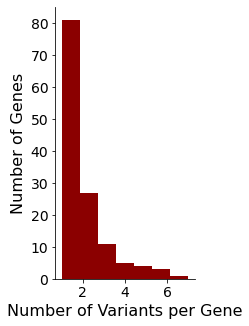

In [20]:
from collections import Counter

combined_df = combined_df_dict['schizophrenia_nature']
counts_df = counts_df_dict['schizophrenia_nature']
print(len(set(combined_df['gene'])))

plt.figure(figsize=(2.5,5))

values = Counter(combined_df['gene']).values()
plt.hist(values,bins=len(set(values)),color='darkred')
plt.xlabel('Number of Variants per Gene',fontsize=16)
plt.ylabel('Number of Genes',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()

plot_dir = '/data/cb/alexwu/mm_finemap/figures'
# plt.savefig(os.path.join(plot_dir,'variant_gene','variants_per_gene.pdf'), dpi=500, bbox_inches = "tight")
np.savetxt(os.path.join(plot_dir,"variant_gene","variants_per_gene.csv"),list(values))
plt.show()

In [22]:
counts_df[counts_df['counts'] > 3].shape

(13, 3)

In [23]:
counts_df[counts_df['counts'] >= 5]

,gene,counts,rank
IGSF9B,IGSF9B,7,1
PSD2,PSD2,6,2
KCNG2,KCNG2,6,3
SLC66A2,SLC66A2,6,4
MYT1L-AS1,MYT1L-AS1,5,5
DLX2,DLX2,5,6
DLX1,DLX1,5,7
HSBP1L1,HSBP1L1,5,8


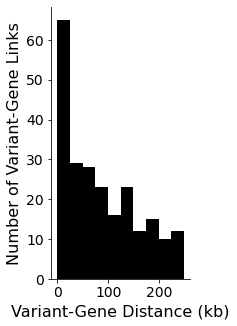

In [24]:
plt.figure(figsize=(2.5,5))
plt.hist(abs(combined_df['dist'])/1000,bins=10,color='black')
plt.xlabel('Variant-Gene Distance (kb)',fontsize=16)
plt.ylabel('Number of Variant-Gene Links',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()
plot_dir = '/data/cb/alexwu/mm_finemap/figures'
# plt.savefig(os.path.join(plot_dir,'variant_gene','variants_gene_dist.pdf'), dpi=500, bbox_inches = "tight")
np.savetxt(os.path.join(plot_dir,"variant_gene","variants_gene_dist.csv"),abs(combined_df['dist'])/1000)
plt.show()


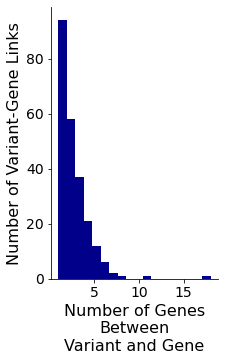

In [25]:
plt.figure(figsize=(3,5))
plt.hist(combined_df['geneRankByDist'],bins=combined_df['geneRankByDist'].max(),color='darkblue')
plt.xlabel('Number of Genes\nBetween\nVariant and Gene',fontsize=16)
plt.ylabel('Number of Variant-Gene Links',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()
plot_dir = '/data/cb/alexwu/mm_finemap/figures'
# plt.savefig(os.path.join(plot_dir,'variant_gene','genes_between_variant_gene.pdf'), dpi=500, bbox_inches = "tight")
np.savetxt(os.path.join(plot_dir,"variant_gene","variants_gene_dist.csv"),combined_df['geneRankByDist'].values)
plt.show()



In [26]:
columns2keep = ['atac_id','gene','dist','gwas_pp','chr_no','pos','nearestGene','geneRankByDist']
combined_df.sort_values('geneRankByDist',ascending=False).iloc[0:5][columns2keep]

,atac_id,gene,dist,gwas_pp,chr_no,pos,nearestGene,geneRankByDist
448,313823,DCP1B,234981.0,0.095,chr12,2239678,CACNA1C-AS4,18
455,320649,NCKAP5L,241664.0,0.070,chr12,50070687,ASIC1,11
158,91067,CYB561D2,-30532.0,0.609,chr3,50320438,HYAL2,8
411,312974,ACAD8,-239018.0,0.070,chr11,134023085,LINC02730,7
404,312971,ACAD8,-247233.0,0.108,chr11,134014628,LINC02730,7


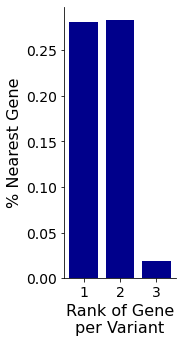

In [27]:
percent_nearest_gene = []
for rank_no in range(3):
    filtered_df = combined_df[combined_df['rank'] == rank_no]
    percent_nearest_gene.append((filtered_df['nearestGene'] == filtered_df['gene']).mean())

plt.figure(figsize=(2,5))
plt.bar(range(1,4),percent_nearest_gene,color='darkblue')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Rank of Gene\nper Variant',fontsize=16)
plt.ylabel('% Nearest Gene',fontsize=16)
sns.despine()
plt.show()

### Compare to Nature SCZ

In [28]:
data_dir = '/data/cb/alexwu/mm_finemap/data/gwas/human_cortex_multiome/nature_scz_papers'

genes_df = pd.read_csv(os.path.join(data_dir,'Supp_Table12.prioritized_genes.csv'))

prioritized_genes = set(genes_df['Symbol.ID'].values)

overlap = set(counts_df_dict['schizophrenia_nature']['gene'].values) & prioritized_genes

print(len(overlap))
print(overlap)


13
{'PAK6', 'MSI2', 'NAB2', 'ZNF823', 'THOC7', 'C12orf43', 'ZNF835', 'EMX1', 'PLCH2', 'IRF3', 'FURIN', 'BNIP3L', 'HYI'}


In [29]:
import gseapy as gp

# enrichment

trait = 'schizophrenia_nature'
finemap_key = 'finemap_posterior_probability'
pp_thresh = 0.05

data_dir = '/data/cb/alexwu/mm_finemap/data/gwas/human_cortex_multiome'
file_name = '{}.credible_sets.txt.gz'.format(trait)

gwas_df = pd.read_csv(os.path.join(data_dir,file_name),sep='\t',compression='gzip')

# filter GWAS variants by p-value
gwas_df = gwas_df[gwas_df[finemap_key] >= pp_thresh]
gwas_df = gwas_df[gwas_df['atac_id'].notna()]
gwas_df['atac_id'] = gwas_df['atac_id'].astype(int)

# get all possible SCZ genes
atac_id_set = set(gwas_df['atac_id'].values)
inds2keep = [i for i,n in enumerate(eval_df['atac_id'].values) if n in atac_id_set]

n_background = len(set(eval_df.iloc[inds2keep]['gene'])) # number of candidate genes (based on proximity to variants)
n_overlap = len(overlap) # number of genes in overlap
n_links = counts_df_dict['schizophrenia_nature'].shape[0] # number of genes in peak-gene links
n_prioritized = len(set(genes_df['Symbol.ID']))

outdir = '/data/cb/alexwu/mm_finemap/results/gwas/disease_genes_enrichment/enrichr'

background_genes = list(set(eval_df.iloc[inds2keep]['gene']))

enr = gp.enrichr(gene_list=counts_df_dict['schizophrenia_nature']['gene'].values.tolist(),
                 gene_sets={'nature_scz': list(set(genes_df['Symbol.ID']))},
                 organism='Human',
                 description='test_name',
                 outdir=os.path.join(outdir,'blah'),
                 background=background_genes,
                 cutoff=0.5
                )

results_df = enr.results[enr.results['Adjusted P-value'] < 0.5]
results_df

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Genes
0,CUSTOM140629644425536,nature_scz,13/29,0.082645,0.082645,PAK6;MSI2;NAB2;ZNF823;THOC7;C12orf43;ZNF835;EM...


### Compare to Nature SCZ Prioritized Genes

In [49]:
data_dir = '/data/cb/alexwu/mm_finemap/data/gwas/human_cortex_multiome/nature_scz_papers'

genes_df = pd.read_csv(os.path.join(data_dir,'Supp_Table12.prioritized_genes.csv'))

set(counts_df_dict['schizophrenia_nature']['gene'].values) & set(genes_df['Symbol.ID'])

{'BNIP3L',
 'C12orf43',
 'EMX1',
 'FURIN',
 'HYI',
 'IRF3',
 'MSI2',
 'NAB2',
 'PAK6',
 'PLCH2',
 'RNASEH2C',
 'THOC7',
 'ZNF823',
 'ZNF835'}

In [50]:
trait = 'schizophrenia_nature'

combined_df = combined_df_dict[trait].copy()
gene_txstart_dict = {gene: (chr_no,txstart) for gene,(chr_no,txstart)
                     in zip(*[rna_adata.var.index.values,rna_adata.var[['chr_no','txstart']].values])}

combined_df['gene_txstart'] = [gene_txstart_dict[g][1] for g in combined_df['gene']]
combined_df['gene_txstart_1'] = combined_df['gene_txstart'].astype(int) + 1
combined_df['variant_pos'] = [n.split('-')[1] for n in combined_df['variant']]
combined_df['variant_pos_1'] = combined_df['variant_pos'].astype(int) + 1

# write to file
save_dir = '/data/cb/alexwu/mm_finemap/data/ucsc'
columns = ['chr_no','gene_txstart','gene_txstart_1','chr_no','variant_pos','variant_pos_1',score_key]
combined_df[columns].to_csv(os.path.join(save_dir,'{}.{}.links'.format(trait,score_key)),
                                              header=False,index=False,sep='\t')

### Differentially Expressed SCZ Genes

In [15]:
trait = 'schizophrenia_nature'

combined_df = combined_df_dict[trait].copy()
disease_genes = sorted(list(set(combined_df['gene'])))

In [16]:
from anndata import AnnData

data_dir = '/data/cb/alexwu/mm_finemap/data/gwas/human_cortex_multiome/GoldmanetalSCZ2016/'

data_df = pd.read_csv(os.path.join(data_dir,'countData_allSamples.txt'),sep='\t')

adata = AnnData(data_df.T)
adata.obs['condition'] = ['control' if 'CTR' in n else 'SCZ' for n in adata.obs.index.values]

sc.pp.normalize_total(adata,target_sum=1e6)
sc.pp.log1p(adata)

/tmp/ipykernel_3488297/3624314639.py:7: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data_df.T)


In [17]:
disease_genes2keep = [n for n in disease_genes if n in adata.var.index.values]
print(len(disease_genes2keep),len(disease_genes))

117 132


In [18]:
disease_adata = adata[:,disease_genes2keep]

# differential expression w.r.t. cycling progenitors
sc.tl.rank_genes_groups(disease_adata,groupby='condition',method='t-test_overestim_var',reference='control')

pvals = disease_adata.uns['rank_genes_groups']['pvals']['SCZ']
pvals_adj = disease_adata.uns['rank_genes_groups']['pvals_adj']['SCZ']
lfc = disease_adata.uns['rank_genes_groups']['logfoldchanges']['SCZ']
gene_names = disease_adata.uns['rank_genes_groups']['names']['SCZ']

up_genes = gene_names[(lfc > 0) & (pvals < 0.05)]
down_genes = gene_names[(lfc < 0) & (pvals < 0.05)]

print(len(up_genes),len(down_genes))

3 21


/data/cb/alexwu/anaconda3/envs/lagnet/lib/python3.8/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


In [19]:
up_genes

array(['TTC12', 'SMIM15', 'DCP1B'], dtype=object)

In [83]:
down_genes

array(['C12orf43', 'STAT6', 'DOCK6', 'ELAC2', 'TACO1', 'RAB27B', 'NTNG2',
       'CTDP1', 'ACAD8', 'ZNF202', 'SCAF1', 'FUT9', 'EPN2-AS1', 'CPT1C',
       'DNAJC27-AS1', 'NCKAP5L', 'KCNG2', 'ASIC1', 'IGSF9B', 'ICA1',
       'P2RX7'], dtype=object)

In [84]:
for g in up_genes:
    print(g,pvals_adj[gene_names == g],pvals[gene_names == g],lfc[gene_names == g])

TTC12 [0.03637093] [0.00279776] [0.68954134]
SMIM15 [0.03742687] [0.00329882] [0.21155716]
DCP1B [0.14420182] [0.0209524] [0.14478329]


In [85]:
for g in down_genes:
    print(g,'   \t',pvals_adj[gene_names == g],'\t',pvals[gene_names == g],'\t',lfc[gene_names == g])

C12orf43    	 [0.21243645] 	 [0.04357671] 	 [-0.14864007]
STAT6    	 [0.20682204] 	 [0.04065732] 	 [-1.2124342]
DOCK6    	 [0.18068202] 	 [0.0339744] 	 [-0.624225]
ELAC2    	 [0.17502694] 	 [0.03141509] 	 [-0.13331105]
TACO1    	 [0.16202664] 	 [0.02769686] 	 [-0.15429232]
RAB27B    	 [0.15457027] 	 [0.02510116] 	 [-0.979861]
NTNG2    	 [0.14769436] 	 [0.02272221] 	 [-0.5668669]
CTDP1    	 [0.13854159] 	 [0.01894586] 	 [-0.14810915]
ACAD8    	 [0.08643212] 	 [0.01108104] 	 [-0.23425294]
ZNF202    	 [0.08332416] 	 [0.00975613] 	 [-0.33455896]
SCAF1    	 [0.08332416] 	 [0.00997041] 	 [-0.22742435]
FUT9    	 [0.05374739] 	 [0.00551255] 	 [-1.0648583]
EPN2-AS1    	 [0.03742687] 	 [0.00351877] 	 [-1.6433353]
CPT1C    	 [0.03181049] 	 [0.00217508] 	 [-0.3616984]
DNAJC27-AS1    	 [0.02199071] 	 [0.00131568] 	 [-0.46869382]
NCKAP5L    	 [0.00694535] 	 [0.00033382] 	 [-0.31026113]
KCNG2    	 [0.00694535] 	 [0.00035617] 	 [-1.4238665]
ASIC1    	 [0.00694535] 	 [0.00029325] 	 [-0.8387755]
IGSF9B 

## Distribution of Variant Annotations

https://useast.ensembl.org/info/genome/variation/prediction/predicted_data.html

downstream_variant: within 5KB
upstream_variant: within 5KB

In [12]:
data_dir = '/data/cb/alexwu/mm_finemap/data/gwas/human_cortex_multiome'

trait = 'schizophrenia_nature'

file_name = '{}.credible_sets.txt.gz'.format(trait)
gwas_df = pd.read_csv(os.path.join(data_dir,file_name),sep='\t',compression='gzip')
gwas_df = gwas_df[gwas_df['finemap_posterior_probability'] > 0.05]

In [13]:
# hierarchy_dict = {'downstream_gene_variant': 'intergenic_variant',
#                   'upstream_gene_variant': 'intergenic_variant',
#                   'TF_binding_site_variant': 'regulatory_region_variant',
#                   'intron_variant,non_coding_transcript_variant': 'intron_variant',
#                   }

hierarchy_dict = {
                  'TF_binding_site_variant': 'regulatory_region_variant',
                  'intron_variant,non_coding_transcript_variant': 'intron_variant',
                  '5_prime_UTR_variant': 'UTR variant',
                  '3_prime_UTR_variant': 'UTR variant',
                  }

### All Credible Sets

In [14]:
annot2keep = ['downstream_gene_variant', 'intron_variant', 'upstream_gene_variant', 
              'intergenic_variant', 'UTR variant', 'regulatory_region_variant'] #'missense_variant', 


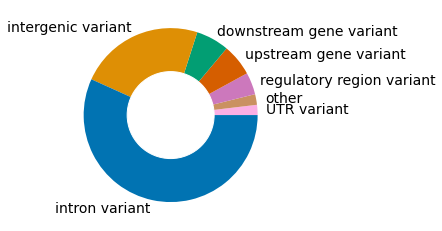

In [18]:
data_dir = '/data/cb/alexwu/mm_finemap/data/gwas/human_cortex_multiome/nature_scz_papers'

full_gwas_df = pd.read_csv(os.path.join(data_dir,'Supp_Table11.credible_sets.csv'))
full_gwas_df = full_gwas_df[full_gwas_df['finemap_posterior_probability'] > 0.05]

impact_list = full_gwas_df['impact'].values

# rename annotation
impact_list = [hierarchy_dict[k] if k in hierarchy_dict else k for k in impact_list]
impact_list = [n if n in annot2keep else 'other' for n in impact_list]

annot_counts = Counter(impact_list)

values = []
labels = []
for k in [k for k,v in sorted(annot_counts.items(),key=lambda item: item[1])]: # + ['other']:
    labels.append(' '.join(k.split('_')))
    values.append(annot_counts[k])
    
colors = sns.color_palette('colorblind')[0:len(set(labels))]
colors.reverse()
plt.pie(values,labels=labels,textprops={'fontsize': 14},colors=colors)

my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plot_dir = '/data/cb/alexwu/mm_finemap/figures'
plt.savefig(os.path.join(plot_dir,'variant_position','variant_position.all.pdf'), dpi=500, bbox_inches = "tight")
plt.show()

### In Peak-Gene Pairs

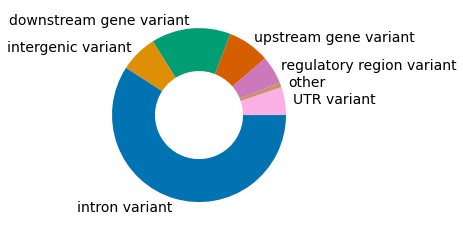

In [19]:
variant_impact_dict = {'{}-{}'.format(chr_no,int(pos)): impact for chr_no,pos,impact 
                       in gwas_df[['chr_liftover','pos_liftover','impact']].values}

links_impact_list = []
for variant in set(combined_df['variant']):
    links_impact_list.append(variant_impact_dict[variant])

# rename annotation
links_impact_list = [hierarchy_dict[k] if k in hierarchy_dict else k for k in links_impact_list]
links_impact_list = [n if n in annot2keep else 'other' for n in links_impact_list]

links_annot_counts = Counter(links_impact_list)

values = []
labels = []
for k in [k for k,v in sorted(annot_counts.items(),key=lambda item: item[1])]: # + ['other']:
    labels.append(' '.join(k.split('_')))
    values.append(links_annot_counts[k])
    
colors = sns.color_palette('colorblind')[0:len(set(labels))]
colors.reverse()
plt.pie(values,labels=labels,textprops={'fontsize': 14},colors=colors)

my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

# plt.legend(bbox_to_anchor=(2,1))

plot_dir = '/data/cb/alexwu/mm_finemap/figures'
plt.savefig(os.path.join(plot_dir,'variant_position','variant_position.in_peak_gene.pdf'), dpi=500, bbox_inches = "tight")
plt.show()

In [23]:
for l,v in zip(*[labels,values]):
    print(l,v)

UTR variant 6
other 1
regulatory region variant 6
upstream gene variant 9
downstream gene variant 17
intergenic variant 8
intron variant 68


In [24]:
8/sum(values)

0.06956521739130435

### Cell Type-Specific Disease Genes

In [26]:
from collections import Counter

distance = 250000
n_layers = 10
n_neighbors = 15
mode = 'lr'

dataset = 'human_cortex_multiome_lineage'
sampling = 'uniform'

rna_adata,atac_adata = load_data(dataset,sampling=sampling,gene_percent_cells=0.01,
                                          peak_percent_cells=0.001,include_h5=False,
                                          distance=distance,preprocess=False)

Only considering the two last: ['.uniform', '.h5ad'].
Only considering the two last: ['.uniform', '.h5ad'].
Only considering the two last: ['.uniform', '.h5ad'].
Only considering the two last: ['.uniform', '.h5ad'].


In [27]:
rna_adata.obs['cell_type_broad'] = [n[:-1] if 'GluN' in n else n for n in rna_adata.obs['cell_type']]

trait = 'schizophrenia_nature'

combined_df = combined_df_dict[trait].copy()
disease_genes = sorted(list(set(combined_df['gene'])))
cell_type_list = sorted(list(set(rna_adata.obs['cell_type_broad'])))

X_list = []
for cell_type in cell_type_list:
    X_list.append(rna_adata[rna_adata.obs['cell_type_broad'] == cell_type][:,disease_genes].X.toarray().mean(0))
X = np.array(X_list)

# normalize
from sklearn.preprocessing import normalize

X = normalize(X,norm='max',axis=0)

exp_df = pd.DataFrame(X,index=cell_type_list,columns=disease_genes)

In [28]:
len(disease_genes)

132

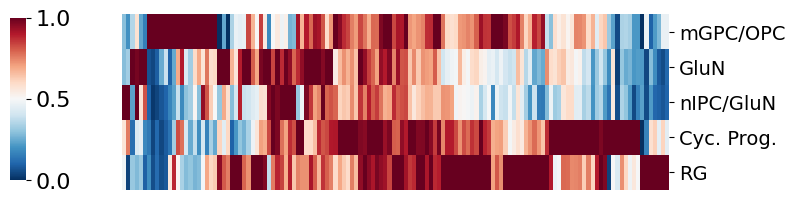

In [30]:
cg = sns.clustermap(exp_df,figsize=(8,2.5),cmap='RdBu_r',xticklabels=False) 
# plt.setp(cg.ax_heatmap.xaxis.get_majorticklabels()) #, rotation=45)
cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)
# cg.cax.set_visible(False)

cg.ax_heatmap.set_yticklabels(cg.ax_heatmap.get_ymajorticklabels(), fontsize = 14)

cg.cax.set_position([0.05, .1, .02, .65])

cg.cax.tick_params(labelsize=16)

plot_dir = '/data/cb/alexwu/mm_finemap/figures'
# plt.savefig(os.path.join(plot_dir,'variant_gene','diff_exp_genes.pdf'), dpi=500, bbox_inches = "tight")
exp_df.to_csv(os.path.join(plot_dir,"variant_gene","diff_exp_genes.csv"))
plt.show()

In [29]:
disease_rna_adata = rna_adata[:,disease_genes].copy()

In [41]:
sc.tl.rank_genes_groups(disease_rna_adata,groupby='cell_type_broad',method='t-test') #,reference='Cyc. Prog.')

pvals_adj = disease_rna_adata.uns['rank_genes_groups']['pvals_adj']
lfc = disease_rna_adata.uns['rank_genes_groups']['logfoldchanges']
gene_names = disease_rna_adata.uns['rank_genes_groups']['names']

In [42]:
all_de_genes = []
for cell_type in set(disease_rna_adata.obs['cell_type_broad']):
    if cell_type != 'Cyc. Prog.!!':
        all_de_genes.extend(gene_names[cell_type][(pvals_adj[cell_type] < 0.05)]) # & (abs(lfc[cell_type]) > 1)])
all_de_genes = set(all_de_genes)
print(len(all_de_genes),len(disease_genes))

104 132


In [43]:
len(set(disease_genes) & all_de_genes)

104

In [179]:
import gseapy as gp

# enrichment

trait = 'schizophrenia_nature'
finemap_key = 'finemap_posterior_probability'
pp_thresh = 0.05

data_dir = '/data/cb/alexwu/mm_finemap/data/gwas/human_cortex_multiome'
file_name = '{}.credible_sets.txt.gz'.format(trait)

gwas_df = pd.read_csv(os.path.join(data_dir,file_name),sep='\t',compression='gzip')

# filter GWAS variants by p-value
gwas_df = gwas_df[gwas_df[finemap_key] >= pp_thresh]
gwas_df = gwas_df[gwas_df['atac_id'].notna()]
gwas_df['atac_id'] = gwas_df['atac_id'].astype(int)

# get all possible SCZ genes
atac_id_set = set(gwas_df['atac_id'].values)
inds2keep = [i for i,n in enumerate(eval_df['atac_id'].values) if n in atac_id_set]

# n_background = len(set(eval_df.iloc[inds2keep]['gene'])) # number of candidate genes (based on proximity to variants)
# n_overlap = len(overlap) # number of genes in overlap
# n_links = counts_df_dict['schizophrenia_nature'].shape[0] # number of genes in peak-gene links
# n_prioritized = len(set(genes_df['Symbol.ID']))

outdir = '/data/cb/alexwu/mm_finemap/results/gwas/disease_genes_enrichment/enrichr'

background_genes = list(set(eval_df.iloc[inds2keep]['gene']))

enr = gp.enrichr(gene_list=counts_df_dict['schizophrenia_nature']['gene'].values.tolist(),
                 gene_sets={'diff_exp': list(set(all_de_genes))},
                 organism='Human',
                 description='test_name',
                 outdir=os.path.join(outdir,'blah'),
                 background=background_genes,
                 cutoff=0.5
                )

# results_df = enr.results[enr.results['Adjusted P-value'] < 0.5]
enr.results

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Genes
0,CUSTOM140701589867648,diff_exp,66/66,3.322354e-40,3.322354e-40,RAB27B;TTC12;DOCK6;DTNB-AS1;C9orf40;TRPM6;NRBP...
